In [529]:
# Basic Modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Split and Scale Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Time Series Modules
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Custom functions for this notebook
from wrangle import *

#shhhh
import warnings
warnings.filterwarnings("ignore")

In [530]:
tb = pd.read_csv("Tuberculosis.csv")

In [531]:
tb.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN


In [532]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       5120 non-null   object 
 1   ISO 2-character country/territory code                                                          5096 non-null   object 
 2   ISO 3-character country/territory code                                                          5120 non-null   object 
 3   ISO numeric country/territory code                                                              5120 non-null   int64  
 4   Region                                                                                          5120 non-null   object 
 5   Year         

In [533]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
ISO numeric country/territory code,5120.0,4.335766e+02,2.551160e+02,4.00,212.0000,430.00,6.460000e+02,8.940000e+02
Year,5120.0,2.001549e+03,6.933272e+00,1990.00,1996.0000,2002.00,2.008000e+03,2.013000e+03
Estimated total population number,5120.0,2.915671e+07,1.183725e+08,1129.00,560119.0000,5172117.50,1.752404e+07,1.385567e+09
Estimated prevalence of TB (all forms) per 100 000 population,5120.0,1.943861e+02,2.590164e+02,0.00,23.0000,85.00,2.720000e+02,1.762000e+03
"Estimated prevalence of TB (all forms) per 100 000 population, low bound",5100.0,1.018154e+02,1.452593e+02,0.11,10.0000,40.00,1.390000e+02,1.316000e+03
"Estimated prevalence of TB (all forms) per 100 000 population, high bound",5100.0,3.210064e+02,4.213261e+02,0.77,43.0000,147.00,4.470000e+02,3.038000e+03
Estimated prevalence of TB (all forms),5120.0,6.654332e+04,3.249488e+05,0.00,380.0000,4300.00,2.700000e+04,4.600000e+06
"Estimated prevalence of TB (all forms), low bound",5100.0,4.615915e+04,2.711918e+05,0.02,170.0000,2100.00,1.400000e+04,4.000000e+06
"Estimated prevalence of TB (all forms), high bound",5100.0,9.319791e+04,3.938631e+05,0.16,720.0000,7700.00,4.500000e+04,5.200000e+06
"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",5120.0,2.017443e+01,3.289380e+01,0.00,1.3000,5.40,2.500000e+01,2.780000e+02


In [534]:
del tb['Method to derive TBHIV estimates']
del tb['Estimated incidence of TB cases who are HIV-positive, high bound']
del tb['Estimated incidence of TB cases who are HIV-positive, low bound']
del tb['Estimated incidence of TB cases who are HIV-positive']

In [535]:
tb.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [536]:
del tb['Estimated HIV in incident TB (percent)']
del tb['Estimated HIV in incident TB (percent), low bound']
del tb['Estimated HIV in incident TB (percent), high bound']
del tb['Estimated incidence of TB cases who are HIV-positive per 100 000 population']
del tb['Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound']
del tb['Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound']

In [537]:
tb.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [538]:
tb.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Method to derive incidence estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,189.0,157.0,238.0,22000.0,18000.0,28000.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,191.0,167.0,227.0,24000.0,21000.0,29000.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,191.0,171.0,217.0,26000.0,24000.0,30000.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,189.0,171.0,209.0,29000.0,26000.0,32000.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,188.0,169.0,208.0,31000.0,28000.0,34000.0,NaN,NaN,NaN,NaN


In [539]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
ISO numeric country/territory code,5120.0,4.335766e+02,2.551160e+02,4.00,212.0000,430.00,6.460000e+02,8.940000e+02
Year,5120.0,2.001549e+03,6.933272e+00,1990.00,1996.0000,2002.00,2.008000e+03,2.013000e+03
Estimated total population number,5120.0,2.915671e+07,1.183725e+08,1129.00,560119.0000,5172117.50,1.752404e+07,1.385567e+09
Estimated prevalence of TB (all forms) per 100 000 population,5120.0,1.943861e+02,2.590164e+02,0.00,23.0000,85.00,2.720000e+02,1.762000e+03
"Estimated prevalence of TB (all forms) per 100 000 population, low bound",5100.0,1.018154e+02,1.452593e+02,0.11,10.0000,40.00,1.390000e+02,1.316000e+03
"Estimated prevalence of TB (all forms) per 100 000 population, high bound",5100.0,3.210064e+02,4.213261e+02,0.77,43.0000,147.00,4.470000e+02,3.038000e+03
Estimated prevalence of TB (all forms),5120.0,6.654332e+04,3.249488e+05,0.00,380.0000,4300.00,2.700000e+04,4.600000e+06
"Estimated prevalence of TB (all forms), low bound",5100.0,4.615915e+04,2.711918e+05,0.02,170.0000,2100.00,1.400000e+04,4.000000e+06
"Estimated prevalence of TB (all forms), high bound",5100.0,9.319791e+04,3.938631e+05,0.16,720.0000,7700.00,4.500000e+04,5.200000e+06
"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",5120.0,2.017443e+01,3.289380e+01,0.00,1.3000,5.40,2.500000e+01,2.780000e+02


In [540]:
tb.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [541]:
cols = ['Estimated prevalence of TB (all forms) per 100 000 population, low bound', 'Estimated prevalence of TB (all forms) per 100 000 population, high bound', 'Estimated prevalence of TB (all forms), low bound',
'Estimated prevalence of TB (all forms), high bound',
'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound',
'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound',
'Estimated number of deaths from TB in people who are HIV-positive, low bound',
'Estimated number of deaths from TB in people who are HIV-positive, high bound',
'Estimated incidence (all forms) per 100 000 population, low bound',
'Estimated incidence (all forms) per 100 000 population, high bound',
'Estimated number of incident cases (all forms), low bound',
'Estimated number of incident cases (all forms), high bound',
'Method to derive incidence estimates',
'Case detection rate (all forms), percent',
'Case detection rate (all forms), percent, low bound',
'Case detection rate (all forms), percent, high bound']

for col in cols:
    del tb[col]

In [542]:
tb.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms)',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estimated mortality of TB cases who are HIV-positive, per 100 000 population',
       'Estimated number of deaths from TB in people who are HIV-positive',
       'Method to derive mortality estimates',
       'Estimated incidence (all forms) per 100 000 population',
       'Estimated number of incident cases (all forms)'],
      dtype='object')

In [543]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 17 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country or territory name                                                          5120 non-null   object 
 1   ISO 2-character country/territory code                                             5096 non-null   object 
 2   ISO 3-character country/territory code                                             5120 non-null   object 
 3   ISO numeric country/territory code                                                 5120 non-null   int64  
 4   Region                                                                             5120 non-null   object 
 5   Year                                                                               5120 non-null   int64

In [544]:
del tb['ISO 3-character country/territory code']
del tb['ISO numeric country/territory code']
del tb['ISO 2-character country/territory code']
del tb['Method to derive prevalence estimates']
del tb['Method to derive mortality estimates']
tb.head()

,Country or territory name,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Estimated prevalence of TB (all forms),"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated mortality of TB cases who are HIV-positive, per 100 000 population",Estimated number of deaths from TB in people who are HIV-positive,Estimated incidence (all forms) per 100 000 population,Estimated number of incident cases (all forms)
0,Afghanistan,EMR,1990,11731193,306.0,36000.0,37.0,4300.0,0.04,5.0,189.0,22000.0
1,Afghanistan,EMR,1991,12612043,343.0,43000.0,46.0,5800.0,0.06,8.0,191.0,24000.0
2,Afghanistan,EMR,1992,13811876,371.0,51000.0,54.0,7400.0,0.08,11.0,191.0,26000.0
3,Afghanistan,EMR,1993,15175325,392.0,59000.0,60.0,9100.0,0.11,17.0,189.0,29000.0
4,Afghanistan,EMR,1994,16485018,410.0,68000.0,65.0,11000.0,0.13,22.0,188.0,31000.0


In [545]:
# Okay, I'm not focusing on HIV, so now that I've confirmed which columns HIV is and isn't included in, let's get to creating just normal columns!
tb["estimated_mortality_per_100k"] = tb["Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population"] + tb["Estimated mortality of TB cases who are HIV-positive, per 100 000 population"]
tb["estimated_deaths"] = tb["Estimated number of deaths from TB (all forms, excluding HIV)"] + tb["Estimated number of deaths from TB in people who are HIV-positive"]
tb = tb.drop(columns=["Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population", "Estimated mortality of TB cases who are HIV-positive, per 100 000 population", "Estimated number of deaths from TB (all forms, excluding HIV)", "Estimated number of deaths from TB in people who are HIV-positive"])
tb.head()
tb = tb.rename(columns={"Estimated number of incident cases (all forms)": "estimated_new_cases", 'Estimated incidence (all forms) per 100 000 population' : "estimated_new_case_per_100k", "Estimated prevalence of TB (all forms)": "estimated_cases", "Estimated prevalence of TB (all forms) per 100 000 population" : "estimated_cases_per_100k", "Estimated total population number" : "estimated_total_pop", "Year":"year", "Region": "region", "Country or territory name": "country"})

In [546]:
tb.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths
0,Afghanistan,EMR,1990,11731193,306.0,36000.0,189.0,22000.0,37.04,4305.0
1,Afghanistan,EMR,1991,12612043,343.0,43000.0,191.0,24000.0,46.06,5808.0
2,Afghanistan,EMR,1992,13811876,371.0,51000.0,191.0,26000.0,54.08,7411.0
3,Afghanistan,EMR,1993,15175325,392.0,59000.0,189.0,29000.0,60.11,9117.0
4,Afghanistan,EMR,1994,16485018,410.0,68000.0,188.0,31000.0,65.13,11022.0


In [547]:
# Much more workable, and should be accurate from much research.

In [548]:
tb.head(30)

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths
0,Afghanistan,EMR,1990,11731193,306.0,36000.0,189.0,22000.0,37.04,4305.0
1,Afghanistan,EMR,1991,12612043,343.0,43000.0,191.0,24000.0,46.06,5808.0
2,Afghanistan,EMR,1992,13811876,371.0,51000.0,191.0,26000.0,54.08,7411.0
3,Afghanistan,EMR,1993,15175325,392.0,59000.0,189.0,29000.0,60.11,9117.0
4,Afghanistan,EMR,1994,16485018,410.0,68000.0,188.0,31000.0,65.13,11022.0
5,Afghanistan,EMR,1995,17586073,424.0,75000.0,188.0,33000.0,69.15,12027.0
6,Afghanistan,EMR,1996,18415307,438.0,81000.0,188.0,35000.0,71.17,13032.0
7,Afghanistan,EMR,1997,19021226,448.0,85000.0,189.0,36000.0,72.19,14037.0
8,Afghanistan,EMR,1998,19496836,454.0,88000.0,189.0,37000.0,72.21,14041.0
9,Afghanistan,EMR,1999,19987071,446.0,89000.0,190.0,38000.0,71.22,14044.0


In [549]:
tb.sort_values("year")

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths
0,Afghanistan,EMR,1990,11731193,306.0,36000.0,189.0,22000.0,37.04,4305.0
700,Brunei Darussalam,WPR,1990,256929,80.0,210.0,64.0,160.0,3.00,7.8
3613,Portugal,EUR,1990,9899450,91.0,9000.0,71.0,7100.0,3.23,323.0
3637,Puerto Rico,AMR,1990,3517984,6.3,220.0,5.2,180.0,2.00,69.0
676,British Virgin Islands,AMR,1990,16459,22.0,3.7,17.0,2.9,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
1951,Guatemala,AMR,2013,15468203,110.0,17000.0,60.0,9200.0,4.20,660.0
1471,Ecuador,AMR,2013,15737878,82.0,13000.0,56.0,8800.0,4.30,680.0
2791,Mali,AFR,2013,15301650,92.0,14000.0,60.0,9200.0,11.20,1790.0
383,Bahrain,EMR,2013,1332171,26.0,350.0,18.0,240.0,0.72,9.6


In [550]:
# reg = list(tb.region[tb.estimated_cases == tb.estimated_cases.max()])[0]
# reg = list(reg)
df = tb[tb.region == list(tb.region[tb.estimated_cases == tb.estimated_cases.max()])[0]]

In [551]:

# tb.region[tb.estimated_cases == tb.estimated_cases.max()]

In [552]:
# df = tb[tb.region == "SEA"]
df.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0


In [553]:
df.sort_values('year')

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0
1304,Democratic People's Republic of Korea,SEA,1990,20194361,480.0,97000.0,384.0,78000.0,110.0,22001.0
2144,Indonesia,SEA,1990,178633239,443.0,790000.0,206.0,370000.0,70.0,120001.0
2744,Maldives,SEA,1990,215859,285.0,620.0,146.0,320.0,29.0,62.0
3065,Myanmar,SEA,1990,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0
...,...,...,...,...,...,...,...,...,...,...
3088,Myanmar,SEA,2013,53259018,473.0,250000.0,373.0,200000.0,57.0,30300.0
3160,Nepal,SEA,2013,27797457,211.0,59000.0,156.0,43000.0,18.2,4920.0
2167,Indonesia,SEA,2013,249865631,272.0,680000.0,183.0,460000.0,26.6,67900.0
4459,Thailand,SEA,2013,67010502,149.0,100000.0,119.0,80000.0,14.8,10000.0


In [554]:
df.country.unique()

array(['Bangladesh', 'Bhutan', "Democratic People's Republic of Korea",
       'India', 'Indonesia', 'Maldives', 'Myanmar', 'Nepal', 'Sri Lanka',
       'Thailand', 'Timor-Leste'], dtype=object)

In [555]:
tb.country[tb.region == "WPR"].unique()

array(['American Samoa', 'Australia', 'Brunei Darussalam', 'Cambodia',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Cook Islands', 'Fiji', 'French Polynesia', 'Guam', 'Japan',
       'Kiribati', "Lao People's Democratic Republic", 'Malaysia',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Mongolia',
       'Nauru', 'New Caledonia', 'New Zealand', 'Niue',
       'Northern Mariana Islands', 'Palau', 'Papua New Guinea',
       'Philippines', 'Republic of Korea', 'Samoa', 'Singapore',
       'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu',
       'Viet Nam', 'Wallis and Futuna Islands'], dtype=object)

Why is Democratic People's Republic of Korea (DPRK : North Korea) in South East Asia (SEA), but Republic of Korea (ROK : South Korea) is not?

There's an odd split in the data... so I might combine SEA and WPR. But that will be for after MVP

------

#### Questions for Data:
- Which area has the most TB per 100k?
- Which area has the highest proportional growth for cases?
- Which area has the highest death ratio?
- Which area has the largest proportional growth for deaths?

In [556]:
df.columns

Index(['country', 'region', 'year', 'estimated_total_pop',
       'estimated_cases_per_100k', 'estimated_cases',
       'estimated_new_case_per_100k', 'estimated_new_cases',
       'estimated_mortality_per_100k', 'estimated_deaths'],
      dtype='object')

In [557]:
df['pop_to_tb'] = round(df.estimated_total_pop / df.estimated_cases)
df.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0


Highest Proportional TB to Population. (57 people to 1 case.) in Bhutan. Same with Cases per 100k, which is to be expected.

In [558]:
df[df.pop_to_tb == df.pop_to_tb.min()]

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb
552,Bhutan,SEA,1990,535738,1762.0,9400.0,777.0,4200.0,277.0,1500.0,57.0


In [559]:
df[df.estimated_cases_per_100k == df.estimated_cases_per_100k.max()]

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb
552,Bhutan,SEA,1990,535738,1762.0,9400.0,777.0,4200.0,277.0,1500.0,57.0


In [560]:
df.groupby('country').pop_to_tb.mean()

country
Bangladesh                                218.166667
Bhutan                                    189.791667
Democratic People's Republic of Korea     207.041667
India                                     275.958333
Indonesia                                 265.416667
Maldives                                 1166.166667
Myanmar                                   144.000000
Nepal                                     413.875000
Sri Lanka                                 937.250000
Thailand                                  484.291667
Timor-Leste                               134.750000
Name: pop_to_tb, dtype: float64

In [561]:
df.groupby('country').pop_to_tb.mean().min()

134.75

---

In [562]:
df

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...
4491,Timor-Leste,SEA,2009,1064191,687.0,7300.0,498.0,5300.0,54.0,580.0,146.0
4492,Timor-Leste,SEA,2010,1079450,669.0,7200.0,498.0,5400.0,49.0,530.0,150.0
4493,Timor-Leste,SEA,2011,1096293,683.0,7500.0,498.0,5500.0,53.0,590.0,146.0
4494,Timor-Leste,SEA,2012,1114106,727.0,8100.0,498.0,5600.0,66.0,740.0,138.0


In [563]:
est_diff = df.estimated_cases.diff()

In [564]:
df_est_diff = df.assign(case_difference = est_diff)

In [565]:
df_est_diff

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0,NaN
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0,10000.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0,10000.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0,10000.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4491,Timor-Leste,SEA,2009,1064191,687.0,7300.0,498.0,5300.0,54.0,580.0,146.0,-600.0
4492,Timor-Leste,SEA,2010,1079450,669.0,7200.0,498.0,5400.0,49.0,530.0,150.0,-100.0
4493,Timor-Leste,SEA,2011,1096293,683.0,7500.0,498.0,5500.0,53.0,590.0,146.0,300.0
4494,Timor-Leste,SEA,2012,1114106,727.0,8100.0,498.0,5600.0,66.0,740.0,138.0,600.0


In [566]:

death_diff = df.estimated_deaths.diff()

In [567]:
new_df = df_est_diff.assign(death_difference = death_diff)
new_df.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0,NaN,NaN
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0,10000.0,1000.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0,10000.0,2000.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0,10000.0,1000.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0,10000.0,2000.0


In [568]:
df = new_df

In [569]:
df['case_difference'] = df.case_difference.fillna(0)

In [570]:
df['death_difference'] = df.death_difference.fillna(0)

In [571]:
df.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference
384,Bangladesh,SEA,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0,0.0,0.0
385,Bangladesh,SEA,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0,10000.0,1000.0
386,Bangladesh,SEA,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0,10000.0,2000.0
387,Bangladesh,SEA,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0,10000.0,1000.0
388,Bangladesh,SEA,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0,10000.0,2000.0


In [572]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 384 to 4495
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       252 non-null    object        
 1   region                        252 non-null    object        
 2   year                          252 non-null    datetime64[ns]
 3   estimated_total_pop           252 non-null    int64         
 4   estimated_cases_per_100k      252 non-null    float64       
 5   estimated_cases               252 non-null    float64       
 6   estimated_new_case_per_100k   252 non-null    float64       
 7   estimated_new_cases           252 non-null    float64       
 8   estimated_mortality_per_100k  252 non-null    float64       
 9   estimated_deaths              252 non-null    float64       
 10  pop_to_tb                     252 non-null    float64       
 11  case_difference              

In [573]:
df.head()

,country,region,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference
384,Bangladesh,SEA,1990-01-01,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0,0.0,0.0
385,Bangladesh,SEA,1991-01-01,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0,10000.0,1000.0
386,Bangladesh,SEA,1992-01-01,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0,10000.0,2000.0
387,Bangladesh,SEA,1993-01-01,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0,10000.0,1000.0
388,Bangladesh,SEA,1994-01-01,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0,10000.0,2000.0


In [574]:
df = df.set_index('year').sort_index()
df.head(20)

,country,region,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference
year,,,,,,,,,,,,
1990-01-01,Bangladesh,SEA,107385847,504.0,540000.0,226.0,240000.0,80.00,86000.0,199.0,0.0,0.0
1990-01-01,Democratic People's Republic of Korea,SEA,20194361,480.0,97000.0,384.0,78000.0,110.00,22001.0,208.0,95500.0,21913.0
1990-01-01,Indonesia,SEA,178633239,443.0,790000.0,206.0,370000.0,70.00,120001.0,226.0,-1810000.0,-157999.0
1990-01-01,Maldives,SEA,215859,285.0,620.0,146.0,320.0,29.00,62.0,348.0,-679380.0,-67838.0
1990-01-01,Myanmar,SEA,42123003,894.0,380000.0,395.0,170000.0,155.60,65690.0,111.0,379800.0,65682.4
1990-01-01,Bhutan,SEA,535738,1762.0,9400.0,777.0,4200.0,277.00,1500.0,57.0,-620600.0,-78660.0
1990-01-01,Nepal,SEA,18111200,348.0,63000.0,164.0,30000.0,52.01,9401.0,287.0,-187000.0,-20899.0
1990-01-01,Sri Lanka,SEA,17323977,111.0,19000.0,66.0,11000.0,7.60,1300.0,912.0,-40000.0,-3620.0
1990-01-01,Thailand,SEA,56582726,211.0,120000.0,138.0,78000.0,20.30,11720.0,472.0,98000.0,10414.0


In [575]:
df = wrangle_tb()

In [576]:
df.head(10)

,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
3065,1990,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0,111.0,0.0,0.0,0.0
3066,1991,42782387,894.0,380000.0,396.0,170000.0,156.8,67200.0,113.0,0.0,1510.0,0.0
3067,1992,43422423,890.0,390000.0,397.0,170000.0,158.3,68900.0,111.0,10000.0,1700.0,0.0
3068,1993,44052710,889.0,390000.0,399.0,180000.0,161.3,70800.0,113.0,0.0,1900.0,10000.0
3069,1994,44686091,887.0,400000.0,402.0,180000.0,163.6,72900.0,112.0,10000.0,2100.0,0.0
3070,1995,45329862,881.0,400000.0,404.0,180000.0,165.0,75100.0,113.0,0.0,2200.0,0.0
3071,1996,45991828,876.0,400000.0,407.0,190000.0,167.0,77300.0,115.0,0.0,2200.0,10000.0
3072,1997,46664455,872.0,410000.0,409.0,190000.0,167.0,78600.0,114.0,10000.0,1300.0,0.0
3073,1998,47321204,864.0,410000.0,410.0,190000.0,167.0,78800.0,115.0,0.0,200.0,0.0
3074,1999,47925630,857.0,410000.0,411.0,200000.0,164.0,77900.0,117.0,0.0,-900.0,10000.0


I thought maybe there would be a bit of a pattern with the differences, but only the case_difference seems to actually stay the same. Death Difference jumps around a little, but then suddenly has values other than 0 in the ones place. And New Case Difference I thought was maybe a 10k jump every other year, but the pattern breaks if you look at the first 10 instead of first 5.

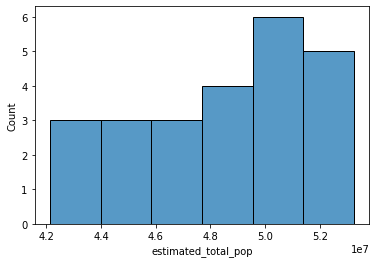

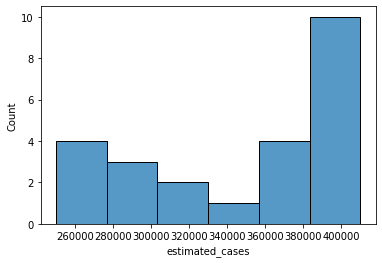

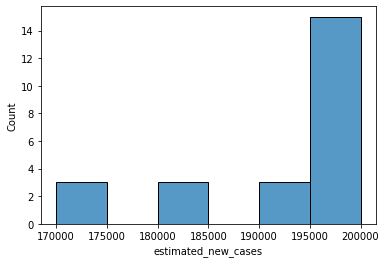

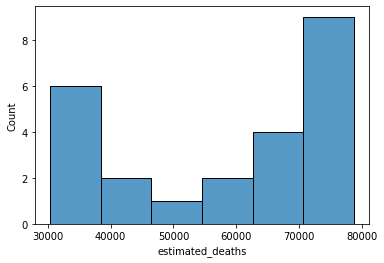

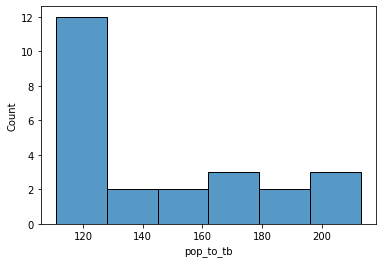

In [577]:
sns.histplot(data= df, x='estimated_total_pop')
plt.show()
sns.histplot(data=df, x= 'estimated_cases')
plt.show()
sns.histplot(data=df, x='estimated_new_cases')
plt.show()
sns.histplot(data=df, x='estimated_deaths')
plt.show()
sns.histplot(data=df, x='pop_to_tb')
plt.show()

In [578]:
print(f"Highest Pop: {df.estimated_total_pop.max()}") 
print(f"Lowest Pop: {df.estimated_total_pop.min()}") 
print(f"Range : {df.estimated_total_pop.max() - df.estimated_total_pop.min()}")

Highest Pop: 53259018
Lowest Pop: 42123003
Range : 11136015


The first four are influenced by population, the first one being population itself we can see there is a large chuck of countries with approximately 300mil or less (just over 200k) for population, and another smaller chunk with approximately 820mil to over 1.2bil. But the pop to tb chart really shows that a huge portion of cases are quite prevalent, with most being 500 or less, while there are a few lucky countries with 1,000 to almost 2,000.

While this is over the span of years, so we'll have a few repeats, it's still proportional.

> To put it into perspective, in 2020 the US had 7,174 cases of TB, with a Case rate of 2.2 per 100k. (CDC)

> In 1990, when this data starts, the US had 25,701 cases, and a Case Rate of 10.3 per 100k.
> And in 2013, when this data ends, the US had 9,545 caes, and a Case Rate of 3 per 100k. (CDC)

In [579]:
# df.year.max()

In [580]:
# df.estimated_cases.max()

In [581]:
# df.estimated_deaths.max()

In [582]:
# df.estimated_new_cases.max()

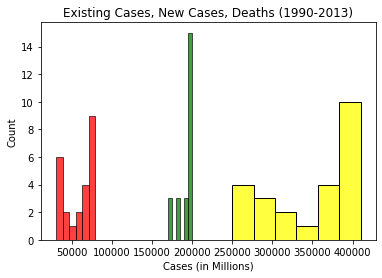

In [583]:
sns.histplot(data=df, x= 'estimated_cases', color="yellow")
sns.histplot(data=df, x='estimated_new_cases', color="green")
sns.histplot(data=df, x='estimated_deaths', color = "red")
plt.xlabel("Cases (in Millions)")
plt.title("Existing Cases, New Cases, Deaths (1990-2013)")
plt.show()

In [584]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.barplot(x=df.country, y=df.pop_to_tb, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

In [585]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.boxplot(x=df.country, y=df.pop_to_tb, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

Looking at the charts I had to go back and check that Bhutan really was the highest prevelance, going by mean over 1990 to 2013, Timor-Leste actually has a higher prevelance, and Myanmar in second. Bhutan just had a year with more prevelance.

In [586]:
# fig, ax = plt.subplots(figsize=(15, 7))
# sns.violinplot(x=df.country, y=df.pop_to_tb, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

The weirdest violins, but they show how consistent some countries case to population count is, and how fluid others are.

In [587]:
# Time to Split (normal)!
def df_split(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

def df_xy_split(train, validate, test, target="tax_value"):
    '''
    Takes in train, validate, and test df, as well as target (default: "tax_value")
    Splits them into X, y using target.
    Returns X, y of train, validate, and test.
    y sets returned as a proper DataFrame.
    '''
    X_train, y_train = train.drop(columns=target), train[target]
    X_validate, y_validate = validate.drop(columns=target), validate[target]
    X_test, y_test = test.drop(columns=target), test[target]
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)
    y_test = pd.DataFrame(y_test)
    return X_train, y_train, X_validate, y_validate, X_test, y_test

def scale(df, columns_for_scaling = ['bedrooms', 'bathrooms', 'tax_value'], scaler = MinMaxScaler()):
    '''
    Takes in df, columns to be scaled (default: bedrooms, bathrooms, tax_value), 
    and scaler (default: MinMaxScaler(); others can be used ie: StandardScaler(), RobustScaler(), QuantileTransformer())
    returns a copy of the df, scaled.
    '''
    scaled_df = df.copy()
    scaled_df[columns_for_scaling] = scaler.fit_transform(df[columns_for_scaling])
    return scaled_df

# Time to Split (time)!
def time_split(df):
    '''
    Splits the Dataframe into 50%, 30% and 20% then plots them to show no gaps or overlapping
    Returns the splits as Train, Validate and Test.
    '''
    train_size = int(len(df) * .5)
    validate_size = int(len(df) * .3)
    test_size = int(len(df) - train_size - validate_size)
    validate_end_index = train_size + validate_size

    # split into train, validation, test
    train = df[: train_size]
    validate = df[train_size : validate_end_index]
    test = df[validate_end_index : ]
    for col in train.columns:
        plt.figure(figsize=(12,4))
        plt.plot(train[col])
        plt.plot(validate[col])
        plt.plot(test[col])
        plt.ylabel(col)
        plt.show()
    return train, validate, test

def create_y(train):
    '''
    Creates y Dataframe using target
    Returns y
    '''
    y = train.estimated_cases
    return y

def decomp(y):
    '''
    Takes y
    Seasonal decomposes y, then plots the results.
    returns decomposition and decomposition2
    '''
    result = sm.tsa.seasonal_decompose(y)
    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid,
    })
    print("Cases Seasonality Decomposition:")
    print(decomposition.head())
    print("")
    print("")
    decomposition.iloc[:, 1:].plot()
    decomposition.plot()
    result.plot()
    plt.show()
    return decomposition

def plot_y(y):
    '''
    Takes y
    Plots out the Cases per Year, 
    '''
    ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=0)
    ax.set(title='Cases by Year', xlabel='Year', ylabel='Cases')
    plt.show()

-------

### Time Regression:

In [588]:
df = year_to_dt(df)
df.head()

,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
year,,,,,,,,,,,
1990-01-01,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0,111.0,0.0,0.0,0.0
1991-01-01,42782387,894.0,380000.0,396.0,170000.0,156.8,67200.0,113.0,0.0,1510.0,0.0
1992-01-01,43422423,890.0,390000.0,397.0,170000.0,158.3,68900.0,111.0,10000.0,1700.0,0.0
1993-01-01,44052710,889.0,390000.0,399.0,180000.0,161.3,70800.0,113.0,0.0,1900.0,10000.0
1994-01-01,44686091,887.0,400000.0,402.0,180000.0,163.6,72900.0,112.0,10000.0,2100.0,0.0


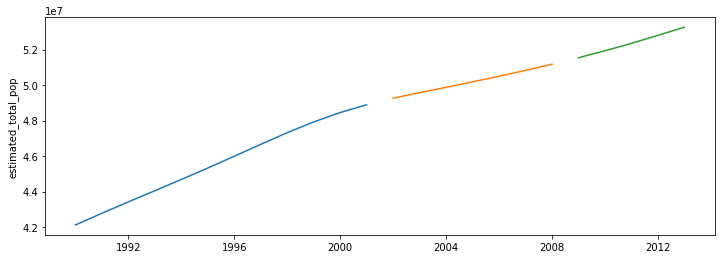

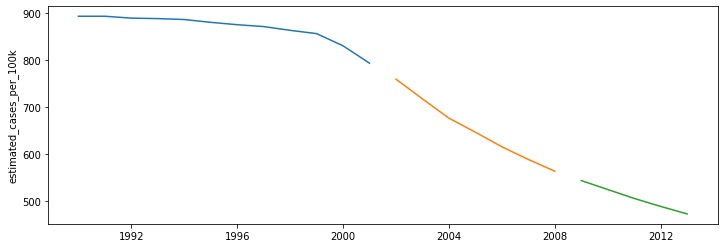

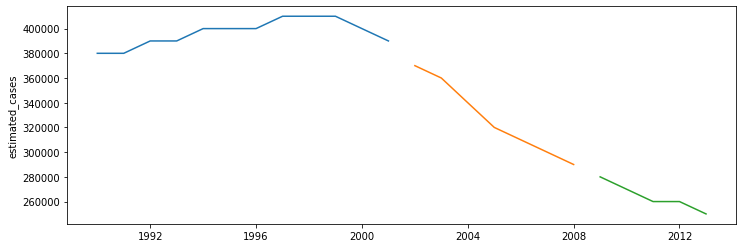

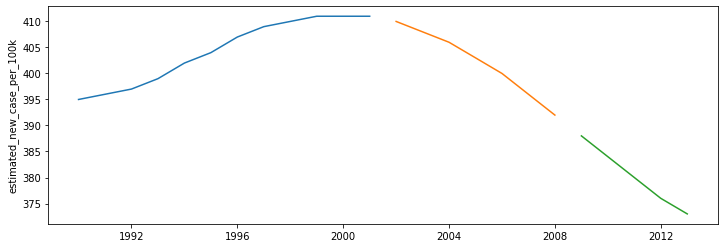

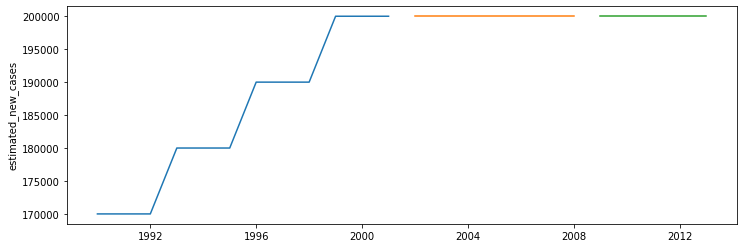

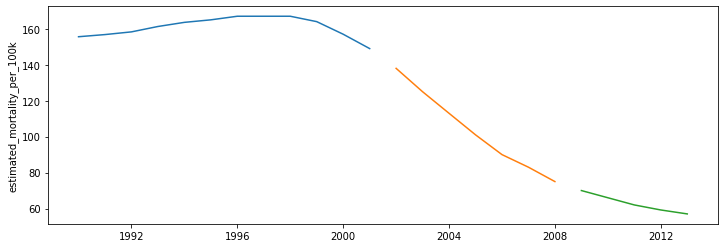

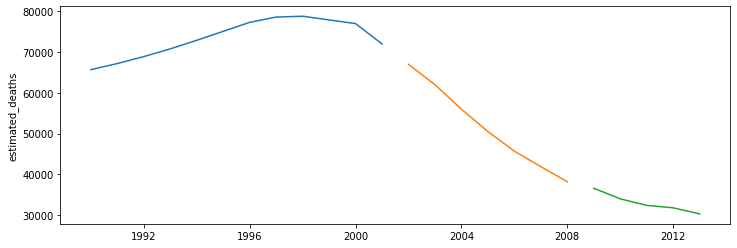

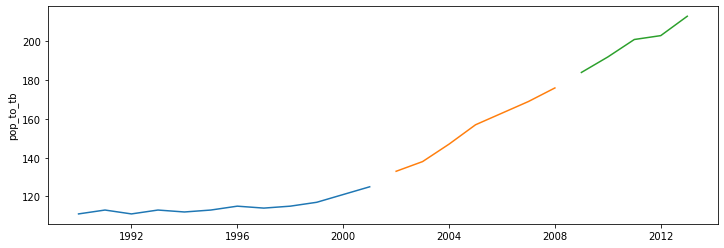

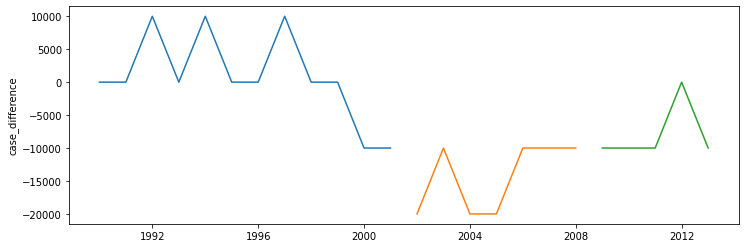

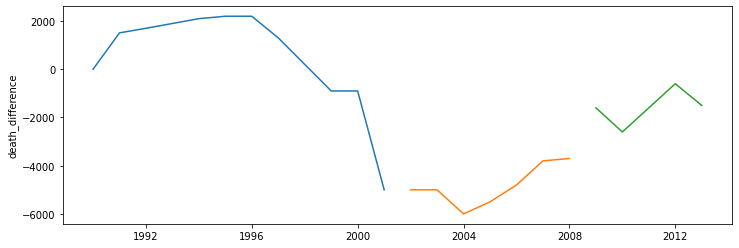

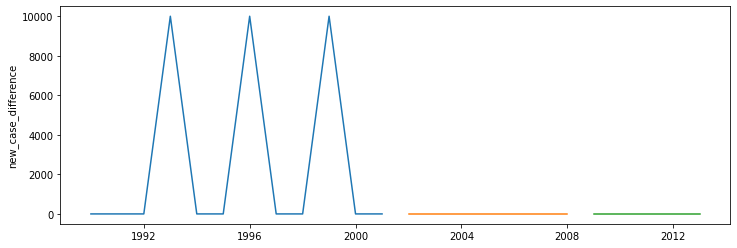

In [589]:
train, validate, test = time_split(df)

In [590]:
# df.country.unique(), df.country.nunique()

In [591]:
# bang = df[df.country == "Bangladesh"]
# dprk = df[df.country == "Democratic People's Republic of Korea"]
# indo = df[df.country == "Indonesia"]
# mald = df[df.country == "Maldives"]
# myan = df[df.country == "Myanmar"]
# bhu = df[df.country == "Bhutan"]
# nepal = df[df.country == "Nepal"]
# sri = df[df.country == "Sri Lanka"]
# thai = df[df.country == "Thailand"]
# india = df[df.country == "India"]
# timor = df[df.country == "Timor-Leste"]

In [592]:
# myan.head()

For Time sake we'll start with Myanmar since it has the second highest ratio, and a little more distribution than Timor-Leste

In [593]:
# train, validate, test = time_split(myan)
# train.head()

In [594]:
df

,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
year,,,,,,,,,,,
1990-01-01,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0,111.0,0.0,0.0,0.0
1991-01-01,42782387,894.0,380000.0,396.0,170000.0,156.8,67200.0,113.0,0.0,1510.0,0.0
1992-01-01,43422423,890.0,390000.0,397.0,170000.0,158.3,68900.0,111.0,10000.0,1700.0,0.0
1993-01-01,44052710,889.0,390000.0,399.0,180000.0,161.3,70800.0,113.0,0.0,1900.0,10000.0
1994-01-01,44686091,887.0,400000.0,402.0,180000.0,163.6,72900.0,112.0,10000.0,2100.0,0.0
1995-01-01,45329862,881.0,400000.0,404.0,180000.0,165.0,75100.0,113.0,0.0,2200.0,0.0
1996-01-01,45991828,876.0,400000.0,407.0,190000.0,167.0,77300.0,115.0,0.0,2200.0,10000.0
1997-01-01,46664455,872.0,410000.0,409.0,190000.0,167.0,78600.0,114.0,10000.0,1300.0,0.0
1998-01-01,47321204,864.0,410000.0,410.0,190000.0,167.0,78800.0,115.0,0.0,200.0,0.0


There is an issue with how it fills in because it's not separated by country it's taking the difference from the country before it. I'll address that later.

In [595]:
y = create_y(train)
y

year
1990-01-01    380000.0
1991-01-01    380000.0
1992-01-01    390000.0
1993-01-01    390000.0
1994-01-01    400000.0
1995-01-01    400000.0
1996-01-01    400000.0
1997-01-01    410000.0
1998-01-01    410000.0
1999-01-01    410000.0
2000-01-01    400000.0
2001-01-01    390000.0
Name: estimated_cases, dtype: float64

In [596]:
def histoplots(df):
    '''
    Takes a Dataframe and plots out the histograms for Myanmar's Estimated cases and deaths. As well as one with both Variables.
    '''
    sns.histplot(data= df, x='estimated_cases',color = 'orange')
    plt.xlabel("Estimated Number of Cases")
    plt.show()
    sns.histplot(data= df, x='estimated_deaths')
    plt.xlabel("Estimated Number of Deaths")
    plt.show()
    sns.histplot(data= df, x='estimated_cases', color = 'orange')
    sns.histplot(data= df, x='estimated_deaths')
    plt.xlabel('Estimated Number of Cases and Deaths')
    plt.show()

def correlation(df):
    '''
    Takes in a dataframe
    Returns the corr, p from stats.pearsonr for estimated_cases, and estimated_deaths.
    '''
    corr, p = stats.pearsonr(df.estimated_cases, df.estimated_deaths)
    print (f'''Correlation : {corr}
    p-value : {p}''')
    df.plot.scatter('estimated_cases', 'estimated_deaths')
    plt.title("Estimaed Cases of TB vs. Estimated Deaths from TB")
    plt.text(250_000, 75_000, f'corr = {corr:.3f}')
    plt.show()

    plt.plot(df.estimated_cases, df.estimated_deaths)
    plt.title('Estimated Cases of TB vs Estimated Deaths from TB')
    plt.xlabel('Estimated Cases')
    plt.ylabel('Estimated Deaths')

    plt.text(250_000, 75_000, f'corr = {corr:.2f}')
    plt.text(290_000, 75_000, f'p = {p:e}')
    plt.show()
    return corr, p

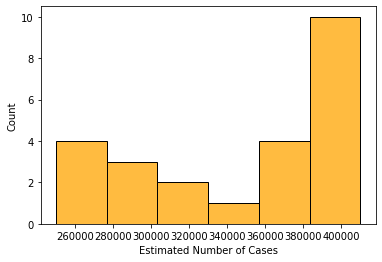

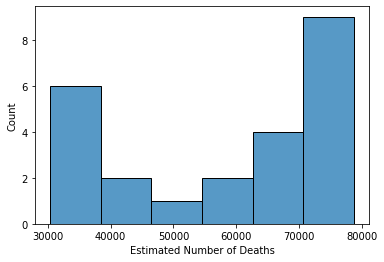

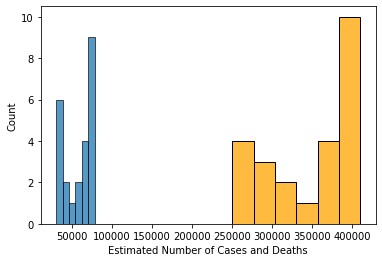

In [597]:
histoplots(df)

Correlation : 0.9962207875420114
    p-value : 7.603453461569432e-25


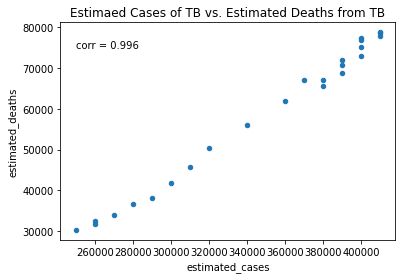

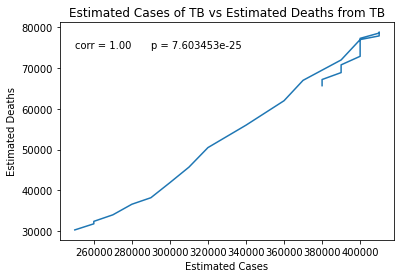

(0.9962207875420114, 7.603453461569432e-25)

In [598]:
correlation(df)

Cases Seasonality Decomposition:
                   y     trend  seasonal  resid
year                                           
1990-01-01  380000.0  380000.0       0.0    0.0
1991-01-01  380000.0  380000.0       0.0    0.0
1992-01-01  390000.0  390000.0       0.0    0.0
1993-01-01  390000.0  390000.0       0.0    0.0
1994-01-01  400000.0  400000.0       0.0    0.0




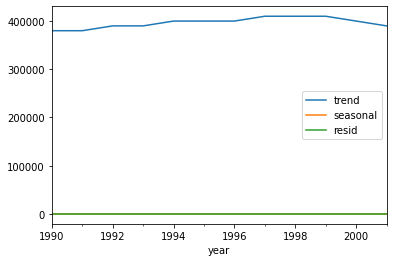

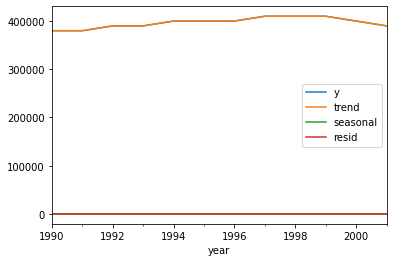

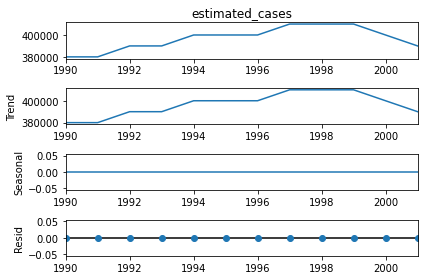

,y,trend,seasonal,resid
year,,,,
1990-01-01,380000.0,380000.0,0.0,0.0
1991-01-01,380000.0,380000.0,0.0,0.0
1992-01-01,390000.0,390000.0,0.0,0.0
1993-01-01,390000.0,390000.0,0.0,0.0
1994-01-01,400000.0,400000.0,0.0,0.0
1995-01-01,400000.0,400000.0,0.0,0.0
1996-01-01,400000.0,400000.0,0.0,0.0
1997-01-01,410000.0,410000.0,0.0,0.0
1998-01-01,410000.0,410000.0,0.0,0.0


In [599]:
decomp(y)

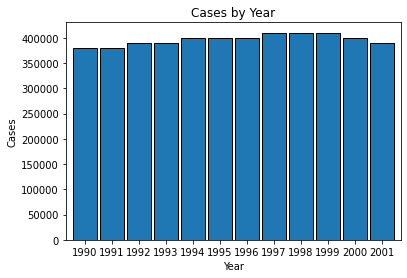

In [600]:
plot_y(y)

I keep driving myself nuts trying to figure out why it only goes to 2001, I keep forgetting that y is from train.

In [601]:
def y_tests(train):
    '''
    Takes in train, 
    Creates y [create_y()],
    plots y [plot_y()],
    and decomposes y [decomp()]
    y and the decomposition aren't required later so it does not return them.
    '''
    y = create_y(train)
    plot_y(y)
    decomp(y)

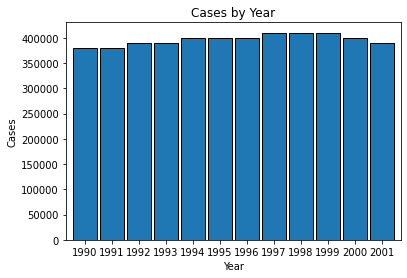

Cases Seasonality Decomposition:
                   y     trend  seasonal  resid
year                                           
1990-01-01  380000.0  380000.0       0.0    0.0
1991-01-01  380000.0  380000.0       0.0    0.0
1992-01-01  390000.0  390000.0       0.0    0.0
1993-01-01  390000.0  390000.0       0.0    0.0
1994-01-01  400000.0  400000.0       0.0    0.0




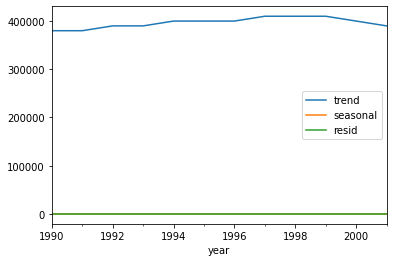

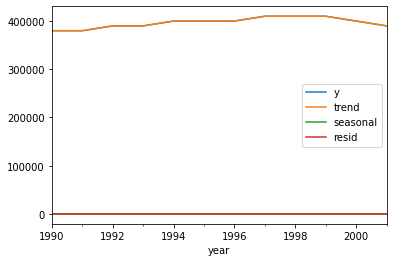

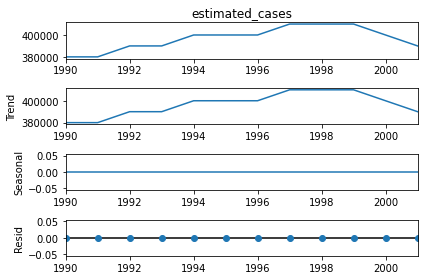

In [602]:
y_tests(train)

In [603]:
train.head()

,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
year,,,,,,,,,,,
1990-01-01,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0,111.0,0.0,0.0,0.0
1991-01-01,42782387,894.0,380000.0,396.0,170000.0,156.8,67200.0,113.0,0.0,1510.0,0.0
1992-01-01,43422423,890.0,390000.0,397.0,170000.0,158.3,68900.0,111.0,10000.0,1700.0,0.0
1993-01-01,44052710,889.0,390000.0,399.0,180000.0,161.3,70800.0,113.0,0.0,1900.0,10000.0
1994-01-01,44686091,887.0,400000.0,402.0,180000.0,163.6,72900.0,112.0,10000.0,2100.0,0.0


<AxesSubplot:xlabel='year'>

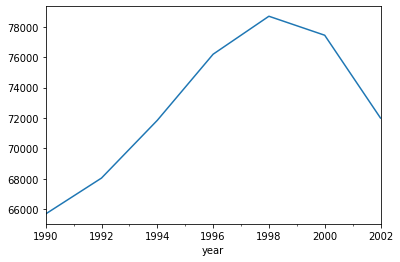

In [604]:
train.resample('2Y').estimated_deaths.mean().plot()

<AxesSubplot:xlabel='year'>

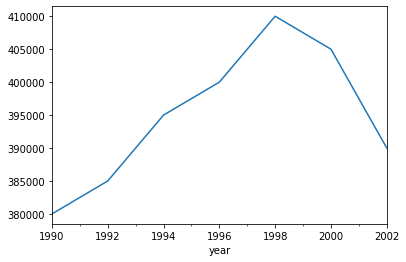

In [605]:
# Categorical = Year
train.resample('2Y').estimated_cases.mean().plot()

------

#### Stats Tests:

In [606]:
alf = 0.05

Distribution of Estimated Cases is Bimodal (took me way to long to confirm that.)

We're going to compare the mean of each year to each other. Which is really just each row.

As they're not normally distributed, and we're comparing subgroup. Mann-Whitney Test time.

In [607]:
y_low = train.estimated_cases[train.index < train.index.mean()]
y_low

year
1990-01-01    380000.0
1991-01-01    380000.0
1992-01-01    390000.0
1993-01-01    390000.0
1994-01-01    400000.0
1995-01-01    400000.0
Name: estimated_cases, dtype: float64

In [608]:
y_high = train.estimated_cases[train.index > train.index.mean()]
y_high

year
1996-01-01    400000.0
1997-01-01    410000.0
1998-01-01    410000.0
1999-01-01    410000.0
2000-01-01    400000.0
2001-01-01    390000.0
Name: estimated_cases, dtype: float64

- H0: The mean of estimated cases from 1990 to 1995 is equal to the mean of estimated cases from 1996 to 2001.
- Ha: The mean of estimated cases from 1990 to 1995 is not equal to the mean of estimated cases from 1996 to 2001.

In [609]:
stat, p = stats.mannwhitneyu(y_low, y_high)

In [610]:
if p < alf:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We reject the Null Hypothesis


- H0: The mean of estimated cases from 1990 to 1995 is less than or equal to the mean of estimated cases from 1996 to 2001.
- Ha: The mean of estimated cases from 1990 to 1995 is greater than the mean of estimated cases from 1996 to 2001.

In [611]:
stat, p = stats.mannwhitneyu(y_low, y_high, alternative='greater')

In [612]:
if p < alf:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We fail to reject the Null Hypothesis


- H0: The mean of estimated cases from 1990 to 1995 is greater than the mean of estimated cases from 1996 to 2001.
- Ha: The mean of estimated cases from 1990 to 1995 is less than or equal to the mean of estimated cases from 1996 to 2001.

In [613]:
stat, p = stats.mannwhitneyu(y_low, y_high, alternative='less')

In [614]:
if p < alf:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We reject the Null Hypothesis


Double Checked some things.

In [615]:
y_low.mean()

390000.0

In [616]:
y_high.mean()

403333.3333333333

Interesting, the Mean is actually rising, probably due to the spike in 1998, as that's the top of the curve.

----
#### Modeling:

In [617]:
def evaluate(validate, yhat_df, target_var):
    '''
    Takes in validate, yhat_df, and target_var
    Uses RMSE to evaluate Validate vs the yhat prediction.
    '''
    rmse = round(sqrt(mean_squared_error(validate.estimated_cases, yhat_df[target_var])), 0)
    return rmse

def plot_and_eval(train, validate, yhat_df ,target_var):
    '''
    Takes Train, Validate, yhat_df, and target_var
    Plots the results of predictions, and Prints the resulting RMSE
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(validate, yhat_df, target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

# Create the empty dataframe
def create_eval():
    '''
    Creates a blank eval_df dataframe with columns model_type, target_var, and rmse
    returns the dataframe
    '''
    eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    return eval_df

# function to store rmse for comparison purposes
def append_eval_df(validate, yhat_df, eval_df, model_type, target_var):
    '''
    Takes in validate, yhat_df, eval_df, model_type, and target_var
    Evalutes the predictions using RMSE
    Creates data to append to the eval_df dataframe.
    Returns the data appended to the eval_df
    '''
    rmse = evaluate(validate, yhat_df, target_var)
    d = {'model_type': [model_type], 'target_var': 'Estimated Cases', 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

def plot_and_eval_test(train, validate, test, yhat_df, target_var):
    '''
    Takes train, validate, test, yhat_df, and target_var
    Plots and Evaluates the results of Evaluating on Test.
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

In [618]:
def create_yhat(train, validate):
    '''
    Takes in Train and Validate
    creates a yhat using mean of estimared_cases
    returns yhat_df
    '''
    yhat_df = pd.DataFrame({'baseline': round(train['estimated_cases'].mean(), 2)}, 
                       index = validate.index)
    return yhat_df

def baseline(train, validate,yhat_df, eval_df):
    yhat_df['estimated_cases'] = round(train['estimated_cases'].mean(), 2)
    eval_df = append_eval_df(validate, yhat_df, eval_df, model_type = 'Baseline', 
                             target_var = "estimated_cases")
    plot_and_eval(train, validate, yhat_df, target_var = "estimated_cases")
    print("predictions:")
    print(yhat_df)
    print("----")
    print(eval_df)
    return eval_df

def last_observed(train, validate,yhat_df, eval_df):
    
    yhat_df['estimated_cases'] = train['estimated_cases'][-1:][0]
    eval_df = append_eval_df(validate, yhat_df, eval_df, model_type = 'Last Observed', 
                             target_var = "estimated_cases")
    plot_and_eval(train, validate, yhat_df, target_var = "estimated_cases")
    print("predictions:")
    print(yhat_df)
    print("----")
    print(eval_df)
    return eval_df


def holts_model(train, validate, yhat_df, eval_df):
    '''
    Takes in train, validate, yhat_df, and eval_df
    Trains to the Holt Prediction Model
    Adds predictions to yhat
    Uses plot_and_eval() to plot out and record evaluations on eval_df
    Returns yhat_df and eval_df
    '''
    model = Holt(train['estimated_cases'], exponential = False)
    model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)
    yhat_cases = model.predict(start = validate.index[0], 
                            end = validate.index[-1])
    yhat_df['estimated_cases'] = round(yhat_cases, 2)
    eval_df = append_eval_df(validate, yhat_df, eval_df, model_type = 'Holts', 
                                target_var = 'estimated_cases')
    plot_and_eval(train, validate, yhat_df, target_var = 'estimated_cases')
    print("predictions:")
    print(yhat_df)
    print("----")
    print(eval_df)
    return eval_df

def fb_prophet(y):
    '''
    Dates in a DataFrame
    Creates New Dataframe using the Data to the specifications in Prophet's documentation,
    Splits the New Dataframe to Train, Validate, and Test
    Fits to Prophet, Creates a Future Dataframe,
    Predicts the Future
    Prints Results and Plots the forecast the model created.
    Returns train, validate, test
    '''
    y = y.copy()
    y = y.reset_index()
    y = y.rename(columns={'year':'ds', 'estimated_cases': 'y'})
    m = Prophet()
    m.fit(y)
    future = m.make_future_dataframe(periods=1)
    future = future[:-1]
    future.tail()
    # f = {'ds': ['1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01', '1995-0-01', '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01']}
    # f = pd.DataFrame(f)
    # future = future.append(y, ignore_index = True)
    # future.ds = pd.to_datetime(future.ds)
    forecast = m.predict(future)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15))
    m.plot(forecast)
    plot_plotly(m, forecast)
    plot_components_plotly(m, forecast)


def best_rmse(eval_df, train):
    '''
    Takes in eval_df and train
    finds the lowest rmse,
    prints the lowest rmse as a table
    Bar Plots the comparisions.
    '''
    # get the min rmse for each variable

    min_rmse_cases = eval_df.rmse.min()
    print(eval_df[(eval_df.rmse == min_rmse_cases)])

    x = eval_df['model_type']
    y = eval_df['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title(col)
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.show()


In [619]:
eval_df = create_eval()
yhat_df = create_yhat(train, validate)

In [620]:
yhat_df

,baseline
year,
2002-01-01,396666.67
2003-01-01,396666.67
2004-01-01,396666.67
2005-01-01,396666.67
2006-01-01,396666.67
2007-01-01,396666.67
2008-01-01,396666.67


estimated_cases -- RMSE: 75003


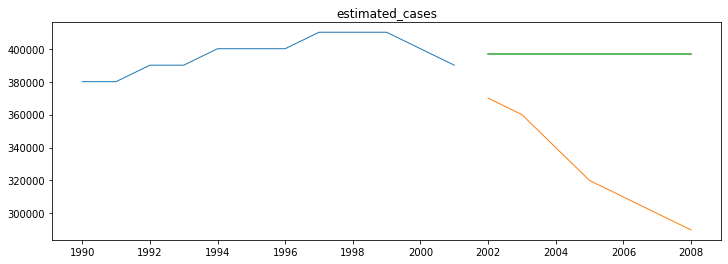

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67        396666.67
2003-01-01  396666.67        396666.67
2004-01-01  396666.67        396666.67
2005-01-01  396666.67        396666.67
2006-01-01  396666.67        396666.67
2007-01-01  396666.67        396666.67
2008-01-01  396666.67        396666.67
----
  model_type       target_var     rmse
0   Baseline  Estimated Cases  75003.0


In [621]:
eval_df = baseline(train, validate, yhat_df, eval_df)

estimated_cases -- RMSE: 81229


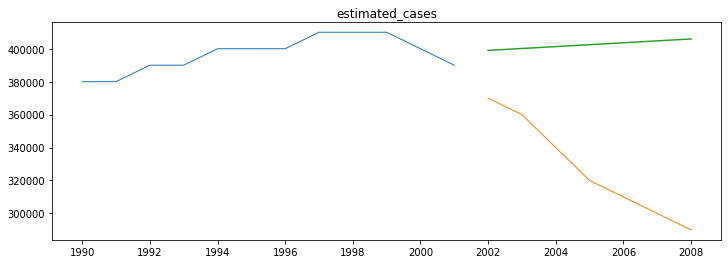

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67        398979.62
2003-01-01  396666.67        400137.95
2004-01-01  396666.67        401296.28
2005-01-01  396666.67        402454.62
2006-01-01  396666.67        403612.95
2007-01-01  396666.67        404771.28
2008-01-01  396666.67        405929.61
----
  model_type       target_var     rmse
0   Baseline  Estimated Cases  75003.0
1      Holts  Estimated Cases  81229.0


In [622]:
eval_df = holts_model(train, validate, yhat_df, eval_df)

estimated_cases -- RMSE: 68868


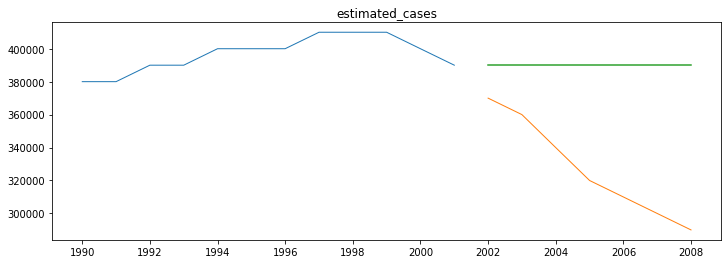

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67         390000.0
2003-01-01  396666.67         390000.0
2004-01-01  396666.67         390000.0
2005-01-01  396666.67         390000.0
2006-01-01  396666.67         390000.0
2007-01-01  396666.67         390000.0
2008-01-01  396666.67         390000.0
----
      model_type       target_var     rmse
0       Baseline  Estimated Cases  75003.0
1          Holts  Estimated Cases  81229.0
2  Last Observed  Estimated Cases  68868.0


In [623]:
eval_df = last_observed(train,validate,yhat_df, eval_df)

05:02:22 - cmdstanpy - INFO - Chain [1] start processing
05:02:22 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  1990-01-01  379433.680000  376191.994079  382746.392176
1  1991-01-01  384067.496372  380629.135101  387761.832662
2  1992-01-01  386705.066881  383285.976879  390106.901875
3  1993-01-01  390523.762170  386942.637266  394202.129799
4  1994-01-01  397134.028694  393788.597016  400499.484150
5  1995-01-01  401392.672055  397954.775994  404815.907751
6  1996-01-01  403655.069030  400381.376471  407024.299676
7  1997-01-01  407098.385589  403817.311176  410688.933522
8  1998-01-01  411476.998818  408025.750420  415048.817458
9  1999-01-01  406298.618858  402863.392120  409864.831958
10 2000-01-01  399123.992971  395524.777719  402662.848130
11 2001-01-01  393104.431816  389666.767132  396468.429014


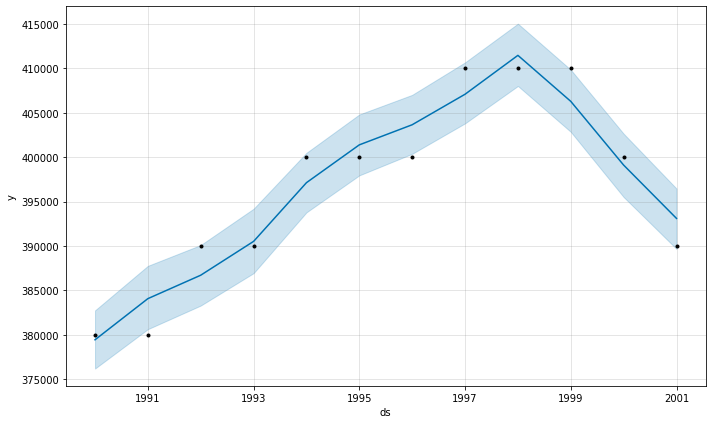

In [624]:
fb_prophet(y)

I still don't know enough about FB Prophet to get it to work correctly, but I love trying to use it. Eventually I'll learn more.

      model_type       target_var     rmse
2  Last Observed  Estimated Cases  68868.0


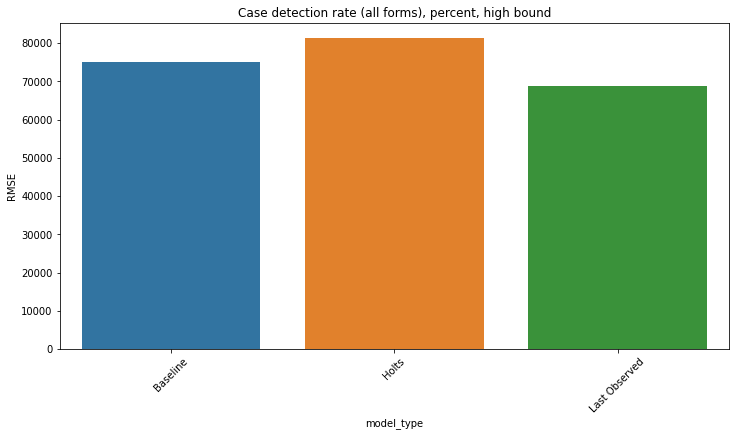

In [625]:
best_rmse(eval_df, train)

In [626]:
def test_model(train, validate, test):
    '''
    Takes in Previous Year's train, validate, and test
    Evaluates the Previous Year model on Test
    Prints the Results
    and Plots them.
    '''
    yhat_df = pd.DataFrame({'estimated_cases': validate['estimated_cases'][-1:][0]}, 
                       index = test.index)
    yhat_df.index = test.index
    rmse_cases = round(sqrt(mean_squared_error(test['estimated_cases'], yhat_df['estimated_cases'])), 2)
    print("On Test:")
    print(f"rmse - seoul_average: {rmse_cases}")
    plot_and_eval_test(train, validate, test, yhat_df, 'estimated_cases')



def plot_and_eval_test(train, validate, test, yhat_df, target_var):
    '''
    Takes train, validate, test, yhat_df, and target_var
    Plots and Evaluates the results of Evaluating on Test.
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

On Test:
rmse - seoul_average: 27928.48


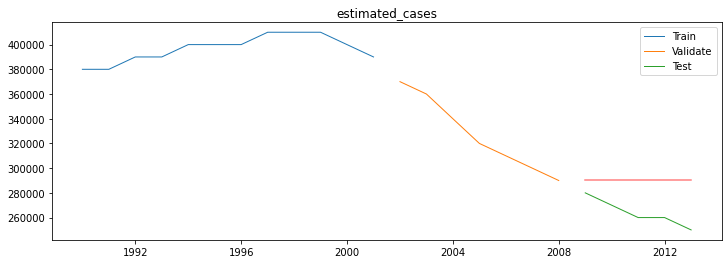

In [628]:
test_model(train, validate,test)